# Faces dataset

## Get the data
[Este conjunto de datos contiene un conjunto de imágenes de rostros tomadas entre abril de 1992 y abril de 1994 en AT&T Laboratories Cambridge. La función sklearn.datasets.fetch_olivetti_faces es la función de obtención/caché de datos que descarga el archivo de datos de AT&T.](https://scikit-learn.org/stable/datasets/real_world.html#the-olivetti-faces-dataset).


[Hay diez imágenes diferentes de cada uno de los 40 sujetos distintos. Para algunos sujetos, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Una imagen de vista previa de la base de datos de caras está disponible.](https://www.kaggle.com/datasets/kasikrit/att-database-of-faces)



In [ ]:
from sklearn import datasets
import numpy as np

faces = datasets.fetch_olivetti_faces()


In [ ]:
n_data=faces.images.shape[0]
faces.images.shape

(400, 64, 64)

In [ ]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

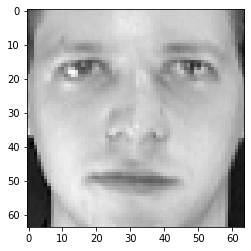

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(faces.images[0],cmap='gray')

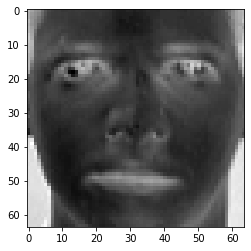

In [ ]:
plt.imshow(faces.images[0]*-1,cmap='gray')

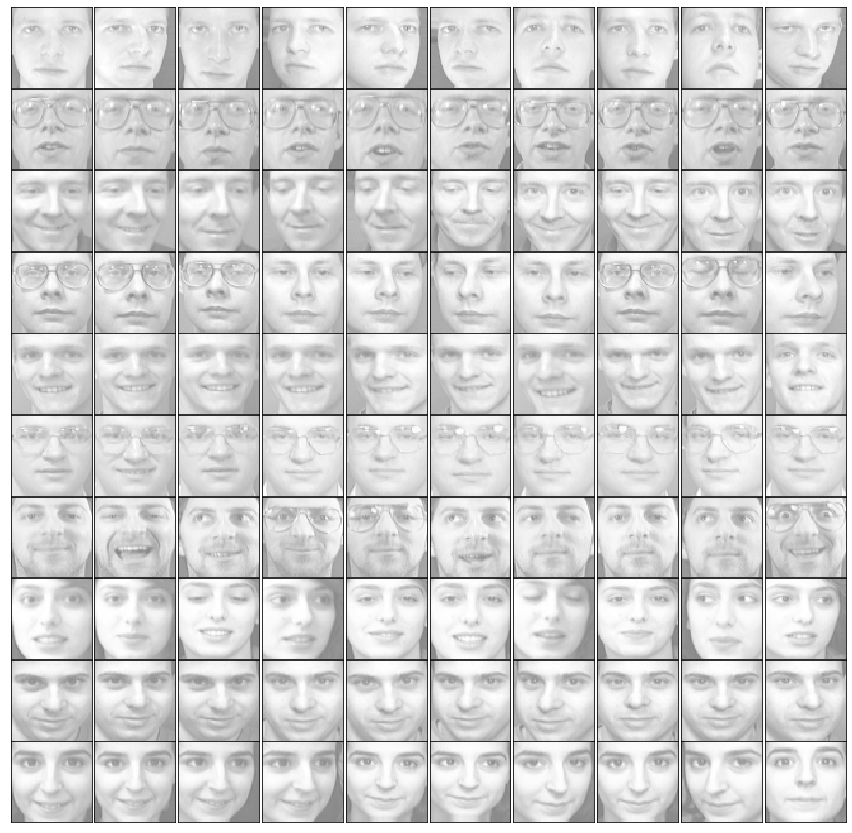

In [ ]:
import math
def plot_faces(data,n=100):
  fig, axes = plt.subplots(math.ceil(n/10),10,figsize=(15,15),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
  for i, ax in enumerate(axes.flat):

    if i<n:
      vmax = max(data[i].max(), -data[i].min())
      ax.imshow(data[i],cmap='gray',interpolation="nearest",
            vmin=-vmax,
            vmax=vmax)

plot_faces(faces.images,n=100)

## PCA

Ahora la idea es como con menos caracteristicas, obtenemos el 80% de variaciòn de los datos.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
#estirar la imagen de una matriz a un vector
X =faces.images.reshape(n_data,-1)
#normalizar la data (media 0 y std 1)
sc = StandardScaler()
X = sc.fit_transform(X)

faces_pca.fit(X)

n_components=len(faces_pca.components_)
n_components

26

In [ ]:
faces_pca.components_.shape

(26, 4096)

Requerimos 26 componentes para representar una imagen de 64x64. Miremos que es cada uno:

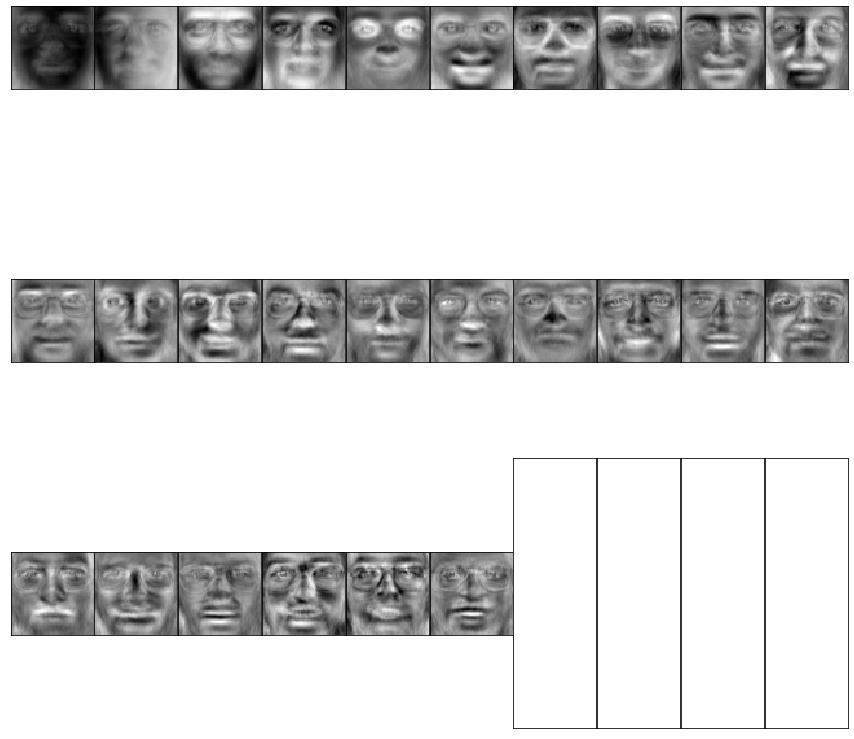

In [ ]:
plot_faces(faces_pca.components_.reshape(n_components,64,64),n=n_components)

Con estos vectores propios, es posible volver a dibujar cualquiera de las caras en el conjunto de datos mediante la ejecución de la transformación del objeto PCA para obtener los vectores propios y, a continuación, la transformación inversa en los vectores propios para obtener todas las imágenes originales:

In [ ]:
components = faces_pca.transform(X)
components.shape


(400, 26)

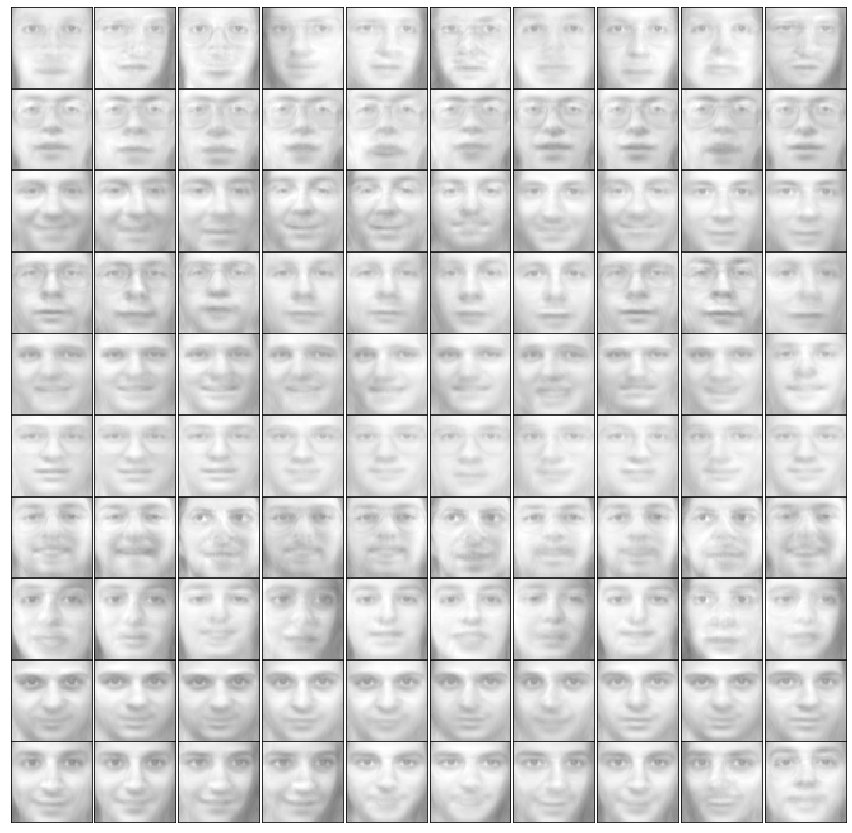

In [ ]:
projected = faces_pca.inverse_transform(components)
projected_unscale=sc.inverse_transform(projected)
plot_faces(projected_unscale.reshape(400,64,64),n=100)

Como se volvieron a dibujar a partir de los vectores propios con el 80 % de la variación en el conjunto de datos, las imágenes resultantes perdieron el 20 % de su definición.

# MNIST DATASET


In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
n_data=x_train.shape[0]
x_train.shape

(60000, 28, 28)

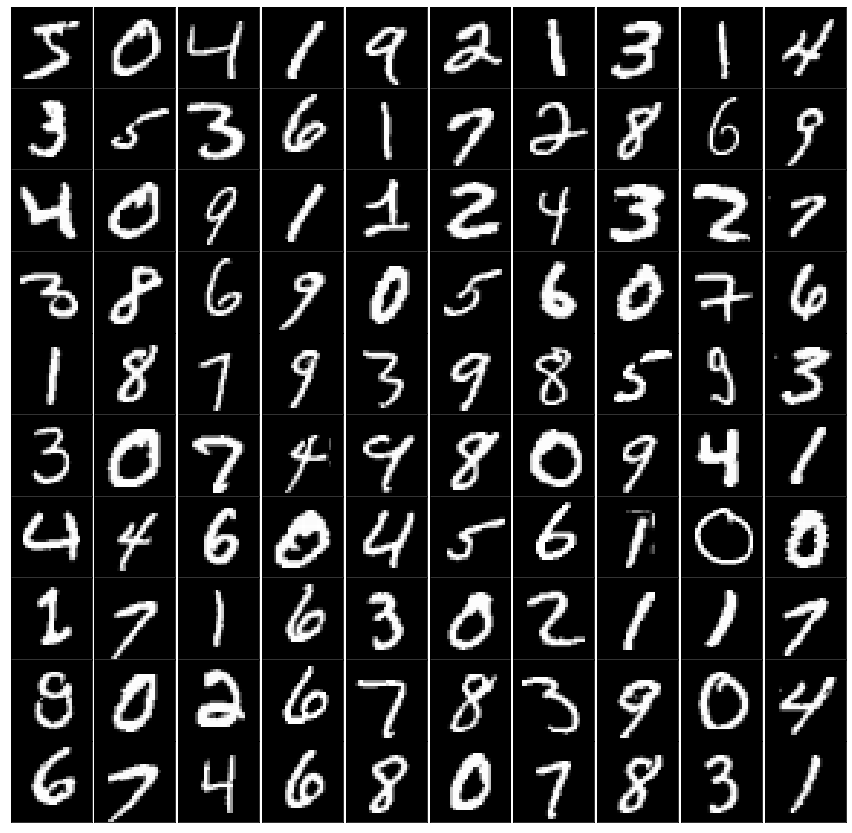

In [ ]:
plot_faces(x_train,n=100)

In [ ]:
from sklearn.decomposition import PCA
number_pca = PCA(n_components=0.8)
X =x_train.reshape(n_data,-1)
sc = StandardScaler()
X = sc.fit_transform(X)

number_pca.fit(X)

n_components=len(number_pca.components_)
n_components

149

In [ ]:
number_pca.components_.shape

(149, 784)

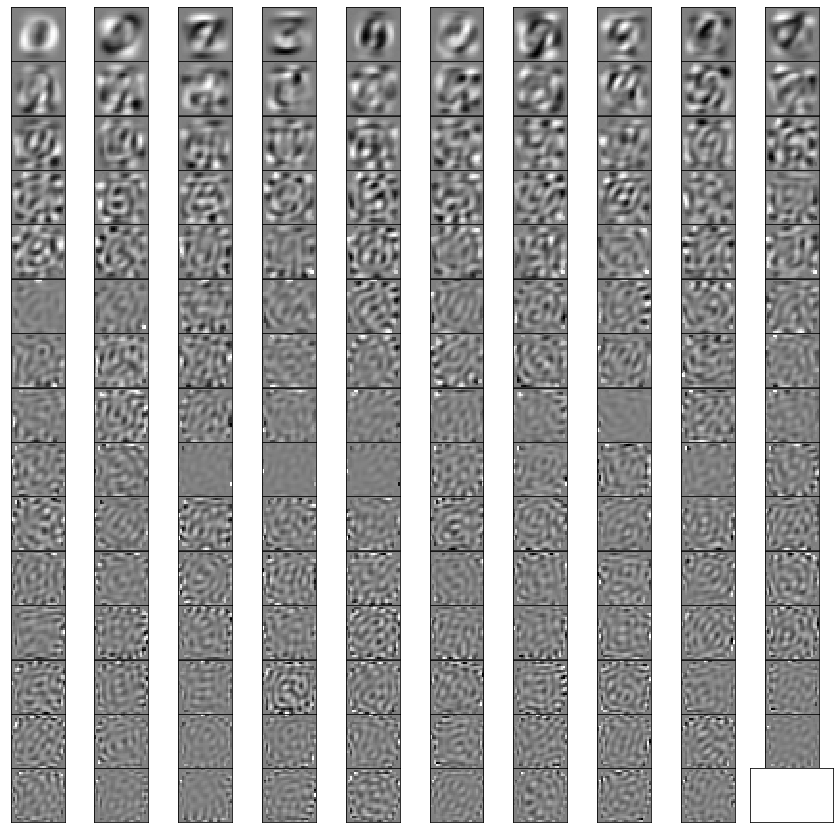

In [ ]:
plot_faces(number_pca.components_.reshape(n_components,28,28),n=n_components)

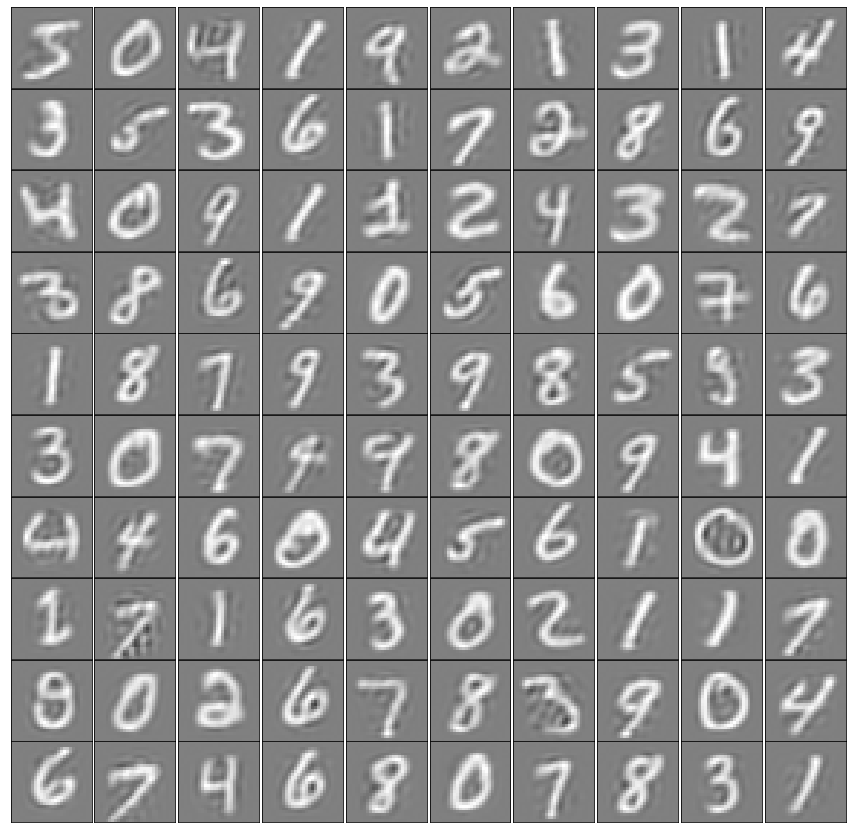

In [ ]:
n=100
x_prueba=x_train[:n]
x_t=sc.transform(x_prueba.reshape(n,-1))
components = number_pca.transform(x_t)
projected = number_pca.inverse_transform(components)
projected_unscale=sc.inverse_transform(projected)
plot_facNMINSTes(projected_unscale.reshape(n,28,28),n=n)